In [1]:
import random

from braket.circuits import Circuit, gates, Instruction
from braket.devices import LocalSimulator
import braket as bk
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def constant_oracle(input_size: int = 3):
    circ = Circuit()
    output = random.randint(0, 1)
    gate = gates.I() if output == 1 else gates.X()
    for i in range(input_size):
        circ.add_instruction(Instruction(gate, i))
    return circ


def balanced_oracle(input_size: int = 3):
    circ = Circuit()
    for i in range(input_size):
        circ.cnot(i, input_size)
    return circ


def initial_state(input_size: int = 3):
    circ = Circuit()
    circ.x(input_size)
    for i in range(input_size + 1):
        circ.h(i)
    return circ

In [3]:
def full_algorithm(input_size: int = 3):
    circ = initial_state(input_size)
    oracle = random.choice([constant_oracle, balanced_oracle])
    print(oracle.__name__)
    circ.add_circuit(oracle(input_size))
    for i in range(input_size):
        circ.h(i)
    return circ

In [4]:
device = LocalSimulator()

balanced_oracle


<BarContainer object of 2 artists>

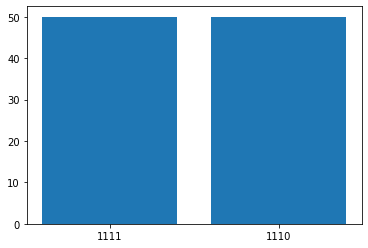

In [5]:
circ = full_algorithm()
counts = device.run(circ, shots=100).result().measurement_counts
plt.bar(x=counts.keys(), height=counts.values())